In [1]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch
import json
import matplotlib.pyplot as plt
from highlight_text import HighlightText
import random

pitch_length_x = 120
pitch_width_y = 80

pd.set_option('display.max_columns', None)

home_team = "Argentina"
away_team = "France"
home_color = "#ADD8E6"
away_color = "#00008B"

/Users/rolandkovacs/Documents/repos/friends_of_tracking/friends_of_tracking/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
with open(f"../data/3869685.json") as f:
    events = json.load(f)

df = pd.json_normalize(events, sep='_').assign(match_id=3869685)

In [3]:
def create_shot_df(df, home_team, away_team):
    shots = df.loc[(df.type_name=='Shot') & (df.minute < 120)]
    
    shots_home = shots[shots.team_name == home_team]
    shots_away = shots[shots.team_name == away_team]

    return (shots_home, shots_away)

def plot_shots(ax, shot_df, color, home=True):
    locations = shot_df.location.values
    goals = shot_df.shot_outcome_name == 'Goal'
    shot_xgs = shot_df.shot_statsbomb_xg.values

    for loc, goal, xg in zip(locations, goals, shot_xgs):
        x = loc[0]
        y = loc[1]

        circleSize = np.sqrt(xg * 12)

        if home:
            if goal:
                    shotCircle = plt.Circle((pitch_length_x - x + random.randint(-9, 9)/10 , y + random.randint(-9, 9)/10),\
                                            circleSize, color=color, edgecolor='black', linewidth=3)
                    shotCircle.set_alpha(.6)
            else:
                    shotCircle = plt.Circle((pitch_length_x - x, y), circleSize, color=color)     
                    shotCircle.set_alpha(.2)
        else:
            if goal:
                shotCircle=plt.Circle((x + random.randint(-9, 9)/10, y + random.randint(-9, 9)/10), circleSize, color=color,\
                                      edgecolor='black', linewidth=3) 
                shotCircle.set_alpha(.6)
            else:
                shotCircle = plt.Circle((x, y), circleSize, color=color)      
                shotCircle.set_alpha(.2)

        ax.add_patch(shotCircle)
        
    return ax

In [4]:
def create_shot_plot(df, home_team, away_team, home_color, away_color, subtitle):
    shots_home, shots_away = create_shot_df(df, home_team, away_team)

    pitch = Pitch(pitch_type='statsbomb', pitch_color='#444444', line_color='#c7d5cc')
    fig, axs = pitch.grid(figheight=7, title_height=0.08, endnote_space=0, axis=False, 
                        title_space=0, grid_height=0.82, endnote_height=0.05)

    fig.set_facecolor("#444444")

    axs['pitch'] = plot_shots(axs['pitch'], shots_home, home_color, home=True)
    axs['pitch'] = plot_shots(axs['pitch'], shots_away, away_color, home=False)

    # endnote /title
    axs['pitch'].text(10, 75, 'XGoal', va='center', ha='center', color='lightgrey', fontsize=12, fontweight='bold')
    axs['pitch'].arrow(4, 78, 20, 0, head_width=2, head_length=1, ec='lightgrey', fc='lightgrey', width=0.2)

    axs['pitch'].add_patch(plt.Circle((17, 75), 0.2, color='lightgrey'))
    axs['pitch'].add_patch(plt.Circle((19, 75), 0.4, color='lightgrey'))
    axs['pitch'].add_patch(plt.Circle((21.5, 75), 0.8, color='lightgrey'))

    highlight_textprops =\
    [{"color": home_color, "fontsize":18, "fontweight":'bold'},
    {"color": "w", "fontsize":18,  "fontweight":'bold'},
    {"color": away_color, "fontsize":18,  "fontweight":'bold'}]

    HighlightText(x=0.5, y=0.7, va='center', ha='center',
                s=f"<{home_team}> <vs> <{away_team}>",
                highlight_textprops=highlight_textprops,
                ax=axs['title'])

    axs['title'].text(0.5, 0.2, subtitle, color='w',
                    va='center', ha='center', fontsize=15) 

    plt.show()

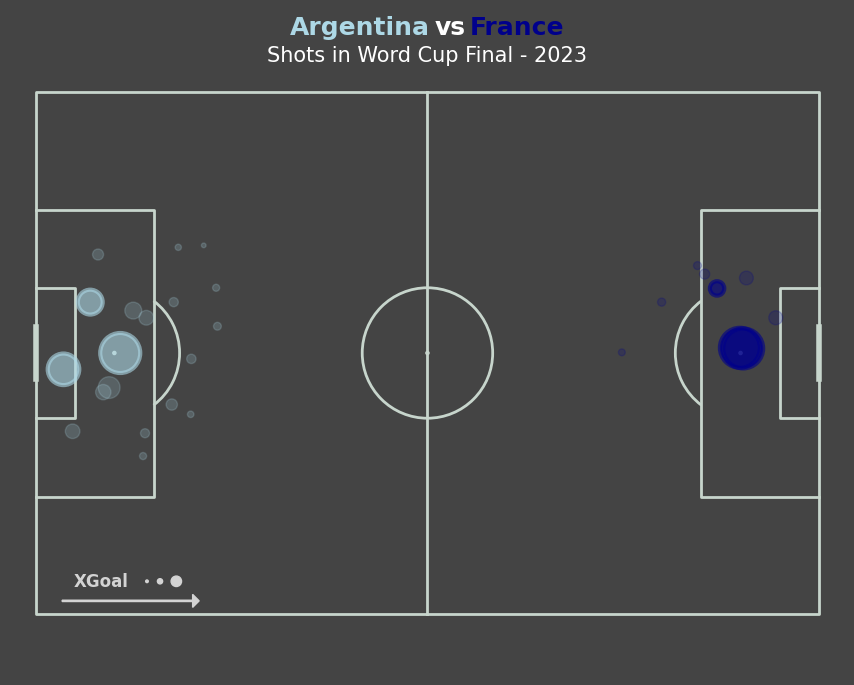

In [5]:
home_team = "Argentina"
away_team = "France"
home_color = "#ADD8E6"
away_color = "#00008B"
subtitle = "Shots in Word Cup Final - 2023"

create_shot_plot(df, home_team, away_team, home_color, away_color, subtitle)